In [1]:
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

In [3]:
from fastai.metrics import accuracy

In [4]:
from fastai.vision import *

In [5]:
import json

In [59]:
import pandas as pd

In [60]:
p = Path('../data')

In [61]:
j = json.load(open('../train.json'))

In [62]:
df = pd.DataFrame({'fnames': list(p.iterdir())})

In [63]:
df.shape

(400000, 1)

In [64]:
df['image_id'] = df.fnames.apply(lambda x: int(str(x).split('/')[-1].split('.')[0]))

In [65]:
anno = {int(k['imageId']): k['labelId'] for k in j['annotations']}

In [66]:
df['cats'] = df.image_id.apply(lambda x: anno[x])

In [67]:
# df['cats'] = df['cats'].apply(lambda x: [int(i) for i in x])

In [68]:
df['cats'] = df['cats'].apply(lambda x: ', '.join(x))

In [69]:
df.head()

,fnames,image_id,cats
0,../data/317667.jpg,317667,"36, 66, 44, 116, 171, 133"
1,../data/234228.jpg,234228,"19, 131, 17, 222, 66, 137, 214, 155, 164, 128"
2,../data/351500.jpg,351500,"62, 19, 17, 222, 148, 66, 116, 171, 133"
3,../data/22055.jpg,22055,"91, 106, 49, 105"
4,../data/395477.jpg,395477,"62, 66, 97, 153, 105, 73"


In [70]:
# df['shapes'] = df['fnames'].apply(lambda x: imread_fast('../data/' + x))

In [71]:
df['fnames'] = df.fnames.astype('str')

In [72]:
df['fnames'] = df.fnames.apply(lambda x: x.split('/')[-1])

In [19]:
df[['fnames', 'cats']].to_csv('../MC.csv', index=False)

In [20]:
!head ../MC.csv

fnames,cats
317667.jpg,"36, 66, 44, 116, 171, 133"
234228.jpg,"19, 131, 17, 222, 66, 137, 214, 155, 164, 128"
351500.jpg,"62, 19, 17, 222, 148, 66, 116, 171, 133"
22055.jpg,"91, 106, 49, 105"
395477.jpg,"62, 66, 97, 153, 105, 73"
207801.jpg,"40, 19, 79, 117, 17, 222, 106, 102, 53"
422700.jpg,"183, 66, 214, 105, 138"
442266.jpg,"62, 66, 98, 116, 180, 184"
349870.jpg,"195, 25, 79, 17, 142, 148, 66, 176, 105"


In [7]:
data = ImageDataBunch.from_csv('../', 'data', label_delim=',', 
                               csv_labels='MC.csv' ,label_col='cats', size=224)

In [21]:
# data = ImageDataBunch.from_df(df=df, path='../data', label_delim=',', label_col='cats', no_check=True)

In [22]:
data

ImageDataBunch;

Train: LabelList (320000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
36; 66; 44; 116; 171; 133,19; 131; 17; 222; 66; 137; 214; 155; 164; 128,62; 19; 17; 222; 148; 66; 116; 171; 133,91; 106; 49; 105,62; 66; 97; 153; 105; 73
Path: ..;

Valid: LabelList (80000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
11; 66; 53; 210; 70; 164; 204,62; 66; 116; 105; 20,200; 66; 137; 105,66; 137; 214; 105; 138,48; 19; 17; 148; 66; 116; 70; 164; 218
Path: ..;

Test: None

In [22]:
x, y = next(iter(data.valid_dl))

In [23]:
x.shape

torch.Size([64, 3, 224, 224])

In [24]:
y.shape

torch.Size([64, 251])

In [44]:
f_model=models.resnet34
sz=224
bs=64

In [45]:
# learn = cnn_learner(data, f_model, metrics=[accuracy])
learn = cnn_learner(data, f_model)

In [29]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.058323,0.055201,25:38


In [30]:
lrf=learn.lr_find(1e-5,100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


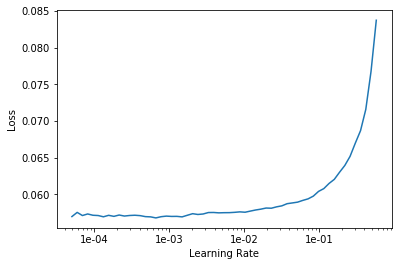

In [33]:
learn.recorder.plot()

In [35]:
lr = 1e-3

In [42]:
# learn.fit_one_cycle(cyc_len=3, max_lr=lr)

In [49]:
learn.load('tmp')

Learner(data=ImageDataBunch;

Train: LabelList (320000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
36; 66; 44; 116; 171; 133,19; 131; 17; 222; 66; 137; 214; 155; 164; 128,62; 19; 17; 222; 148; 66; 116; 171; 133,91; 106; 49; 105,62; 66; 97; 153; 105; 73
Path: ..;

Valid: LabelList (80000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
11; 66; 53; 210; 70; 164; 204,62; 66; 116; 105; 20,200; 66; 137; 105,66; 137; 214; 105; 138,48; 19; 17; 148; 66; 116; 70; 164; 218
Path: ..;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
 

In [30]:
learn.unfreeze()

In [46]:
lrf=learn.lr_find(1e-6,100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


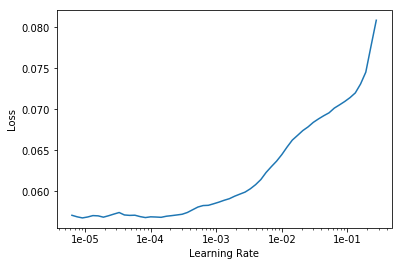

In [47]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(cyc_len=1, max_lr=5e-5)

epoch,train_loss,valid_loss,time
0,0.053565,0.051118,25:30


In [51]:
lrf=learn.lr_find(1e-6,1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot

In [27]:
!ls ../models/

first.pth  tmp.pth


In [43]:
learn.load('first')

Learner(data=ImageDataBunch;

Train: LabelList (320000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
19; 131; 17; 222; 66; 137; 214; 155; 164; 128,91; 106; 49; 105,62; 66; 97; 153; 105; 73,40; 19; 79; 117; 17; 222; 106; 102; 53,183; 66; 214; 105; 138
Path: ..;

Valid: LabelList (80000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
62; 66; 214; 154; 171; 2,222; 66; 7; 105,136; 106; 53; 137; 49; 164,100; 66,5; 106; 176; 115; 153; 28; 105
Path: ..;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0

In [39]:
lrf=learn.lr_find(1e-7,1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


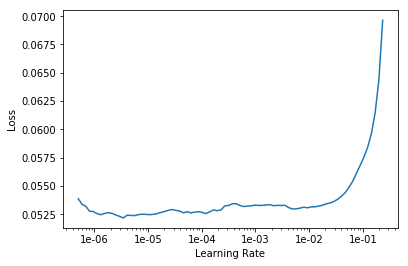

In [40]:
learn.recorder.plot()

In [109]:
learn.save('second')

In [46]:
learn.load('second');

In [47]:
learn.model.eval();

In [14]:
learn.model._modules

OrderedDict([('0', Sequential(
                (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): ReLU(inplace)
                (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (4): Sequential(
                  (0): BasicBlock(
                    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (relu): ReLU(inplace)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  )
                  (1): BasicBlock(
                    (conv1): Conv2d(64, 64, ke

In [48]:
layer = learn.model._modules.get('1')._modules.get('7')

In [49]:
layer

Dropout(p=0.5)

In [50]:
from torchvision import transforms

In [51]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [52]:
import torch
from torch.autograd import Variable

In [53]:
from PIL import Image

In [54]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)

    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))

    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512

    my_embedding = torch.zeros((1, 512))

    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)

    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)

    # 6. Run the model on our transformed image
    learn.model(t_img.cuda())

    # 7. Detach our copy function from the layer
    h.remove()

    # 8. Return the feature vector
    return my_embedding

In [55]:
pic_name = '../data/1000000.jpg'

In [56]:
pic_one_vector = get_vector(pic_name)

In [73]:
df.shape

(400000, 3)

In [74]:
df.head()

,fnames,image_id,cats
0,317667.jpg,317667,"36, 66, 44, 116, 171, 133"
1,234228.jpg,234228,"19, 131, 17, 222, 66, 137, 214, 155, 164, 128"
2,351500.jpg,351500,"62, 19, 17, 222, 148, 66, 116, 171, 133"
3,22055.jpg,22055,"91, 106, 49, 105"
4,395477.jpg,395477,"62, 66, 97, 153, 105, 73"


In [58]:
pic_one_vector.numpy()

array([[ 0.008044,  0.181672,  0.030795, -0.123909, ...,  0.037751, -0.044795, -0.098554, -0.084447]], dtype=float32)

In [95]:
from fastprogress import progress_bar

In [100]:
emb_dict = {}

In [102]:
for fname in progress_bar(df.fnames, total=df.shape[0]):
    vec = get_vector('../data/' + fname)
    emb_dict[fname[:-4]] = vec.numpy()

In [115]:
len(emb_dict)

81058

In [105]:
from annoy import AnnoyIndex

In [129]:
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15.0, 6.0]

In [128]:
def multi_plot(fnames, ncols=3):
    """
        Display multiple images in a grid structure
        fnames: list of file name with full/relative path
    """
    assert ncols != 0
    no_imgs = len(fnames)
    nrows = math.ceil(no_imgs / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows),
                             subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, fname in zip(axes.flat, fnames):
        im = Image.open(fname)
        ax.imshow(im)
        ax.set_title(fname.split('/')[-1], size=20)
    plt.tight_layout()
    plt.show()

In [106]:
f = 512

In [107]:
t = AnnoyIndex(f)

In [119]:
for k,v in emb_dict.items():
    t.add_item(int(k), v[0])

In [120]:
t.build(100)

True

In [121]:
t.save('first.ann')

True

In [122]:
u = AnnoyIndex(f)

`137654`

![](../data/137654.jpg)

In [126]:
t.get_nns_by_item(358257, 10)

[358257, 34348, 24944, 299132, 418930, 378388, 126434, 15086, 145539, 331757]

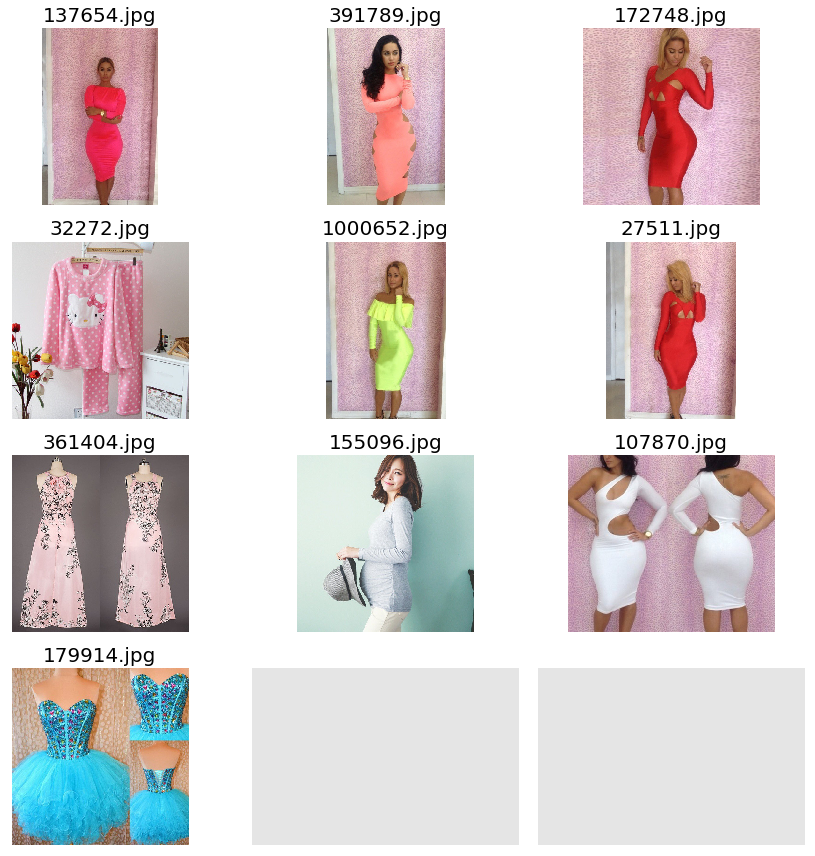

In [132]:
multi_plot([f'../data/{i}.jpg' for i in t.get_nns_by_item(137654, 10)])